In [66]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [67]:
import scipy.signal as signal
def lpf(data,sampling_rate,fp,fs):
  '''
  data # 変換するデータ：np.array形式
  sampling_rate # 計測したサンプリングレート：int
  fp # 通過域端周波数[Hz]:int
  fs # 阻止域端周波数[Hz]:int
  '''
  n=len(data)
  dt=1/sampling_rate
  fn=1/(2*dt)
  gpass = 1  # 通過域最大損失量[dB]
  gstop = 40  # 阻止域最小減衰量[dB]
  # 正規化
  Wp = fp/fn
  Ws = fs/fn
  N, Wn = signal.buttord(Wp, Ws, gpass, gstop)
  b1, a1 = signal.butter(N, Wn, 'low')
  return signal.filtfilt(b1, a1, data) #0 paddingしない場合

def hpf(data,sampling_rate,fp,fs):
  '''
  data # 変換するデータ：np.array形式
  sampling_rate # 計測したサンプリングレート：int
  fp # 通過域端周波数[Hz]:int
  fs # 阻止域端周波数[Hz]:int
  '''
  n=len(data)
  dt=1/sampling_rate
  fn=1/(2*dt)
  gpass = 1  # 通過域最大損失量[dB]
  gstop = 40  # 阻止域最小減衰量[dB]
  # 正規化
  Wp = fp/fn
  Ws = fs/fn
  N, Wn = signal.buttord(Wp, Ws, gpass, gstop)
  b1, a1 = signal.butter(N, Wn, 'high')
  return signal.filtfilt(b1, a1, data) #0 paddingしない場合

# fanctions
def myfft(data,sample_rate):
  '''
  calc fft, Amp and Phase
  '''
  F = np.fft.fft(data)
  N = len(data)
  Amp = np.abs(F/(N/2)) 
  Phase = np.degrees(np.angle(F))
  t = np.linspace(0,len(data),len(data))/sample_rate
  freq = np.linspace(0,sample_rate,len(data))
  return F,Amp,Phase,t,freq


def view_single_fft(data,sample_rate):
  '''
  指定した軸のFFTの結果を可視化する
  '''
  F,Amp,Phase,t,freq = myfft(data,sample_rate)
  # グラフ表示
  fig,ax = plt.subplots(3,1,figsize=(12,9))
  ax[0].plot(t, data, label='f(n)')
  ax[0].set_xlabel("Time", fontsize=10)
  ax[0].set_ylabel("Signal", fontsize=10)
#   ax[0].grid()
  ax[1].loglog(freq[:int(len(freq)/2)], Amp[:int(len(freq)/2)], 'b',label='|F(k)|',alpha=0.1)
  ax[1].loglog(freq[:int(len(freq)/2)], Amp[:int(len(freq)/2)], '.',label='|F(k)|',markersize=3)
  ax[1].set_xlabel('Frequency', fontsize=10)
  ax[1].set_ylabel('Amplitude', fontsize=10)
#   ax[1].grid()
  ax[2].semilogx(freq[:int(len(freq)/2)], Phase[:int(len(freq)/2)], 'b',label='|F(k)|',alpha=0.1)
  ax[2].semilogx(freq[:int(len(freq)/2)], Phase[:int(len(freq)/2)], '.',label='|F(k)|',markersize=3)
  ax[2].set_xlabel('Frequency', fontsize=10)
  ax[2].set_ylabel('Phase', fontsize=10)
#   ax[2].grid()
  ax[2].set_ylim(-185,185)
  plt.tight_layout()
  plt.subplots_adjust(top=0.96)
  plt.show()


In [68]:
data_path = './data_20201130'
sampling_rate = 50
f_list = os.listdir(path=data_path)

In [99]:
df = pd.DataFrame()
for name in f_list:
  df_ = pd.read_csv(data_path+'/'+name)
#   for a in df_.columns:
    df_[a] = lpf(df_[a],25,10,12.5)
    df_[a] = hpf(df_[a],25,0.1,0.01)
  df_['data_name']=name
  df_['time'] = np.arange(len(df_))/sampling_rate
  print(df_.head())
  df = pd.concat((df,df_))

      left   right      add     sub data_name  time
0  1485.64  803.25  2288.89  682.39    瞬き.csv  0.00
1  1484.03  814.53  2298.56  669.50    瞬き.csv  0.02
2  1482.42  831.45  2313.87  650.97    瞬き.csv  0.04
3  1475.17  866.89  2342.06  608.28    瞬き.csv  0.06
4  1488.06  872.53  2360.59  615.53    瞬き.csv  0.08
      left    right      add    sub data_name  time
0  1438.92  1455.83  2894.75 -16.91    近く.csv  0.00
1  1440.53  1444.56  2885.09  -4.03    近く.csv  0.02
2  1442.94  1457.45  2900.39 -14.51    近く.csv  0.04
3  1436.50  1439.72  2876.22  -3.22    近く.csv  0.06
4  1433.28  1443.75  2877.03 -10.47    近く.csv  0.08
      left    right      add     sub data_name  time
0  1670.95  1121.48  2792.43  549.47    左右.csv  0.00
1  1666.92  1115.84  2782.76  551.08    左右.csv  0.02
2  1637.11  1131.96  2769.07  505.15    左右.csv  0.04
3  1597.63  1156.93  2754.56  440.70    左右.csv  0.06
4  1556.54  1158.54  2715.08  398.00    左右.csv  0.08
      left    right      add    sub data_name  time
0  148

瞬き.csv


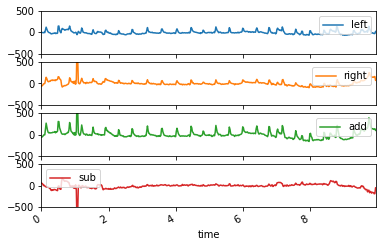

近く.csv


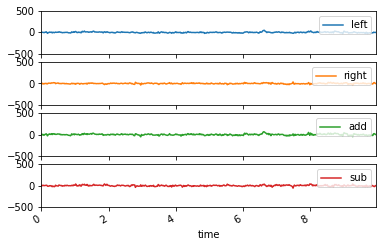

左右.csv


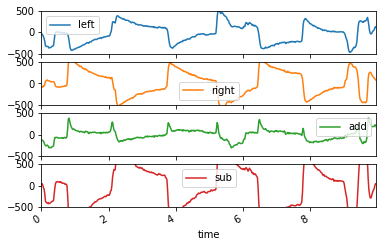

上下2.csv


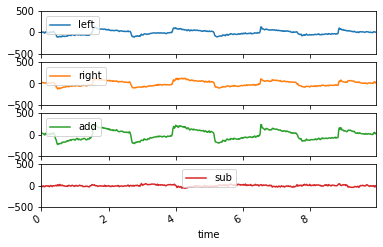

交互2.csv


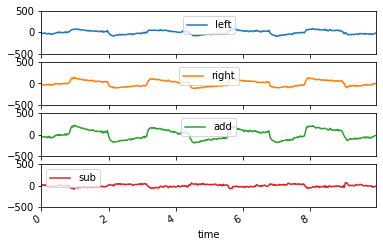

In [70]:
for name in f_list:
  print(name)
  df[df['data_name']==name].plot(x='time',subplots=True,sharey=True,ylim=(-500,500))
  plt.show()

瞬き.csv


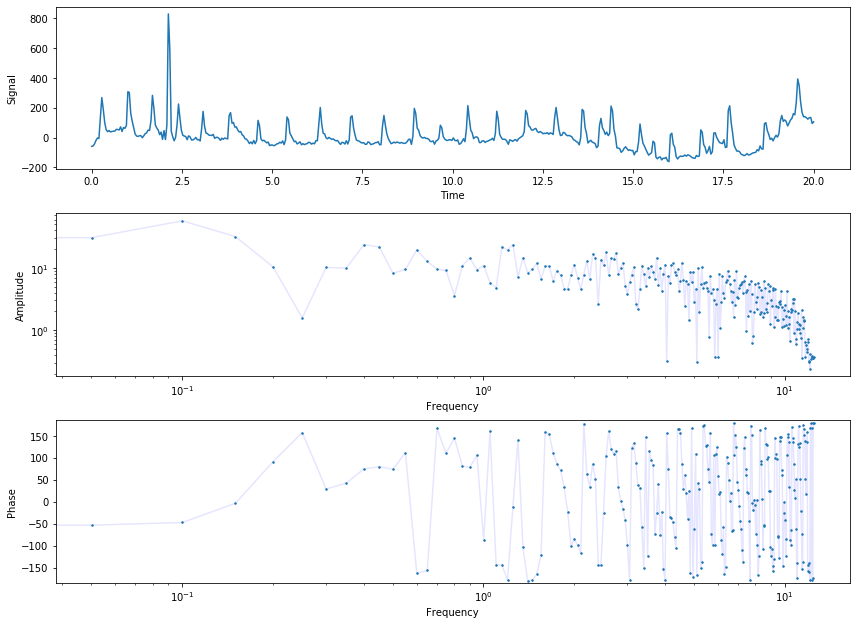

近く.csv


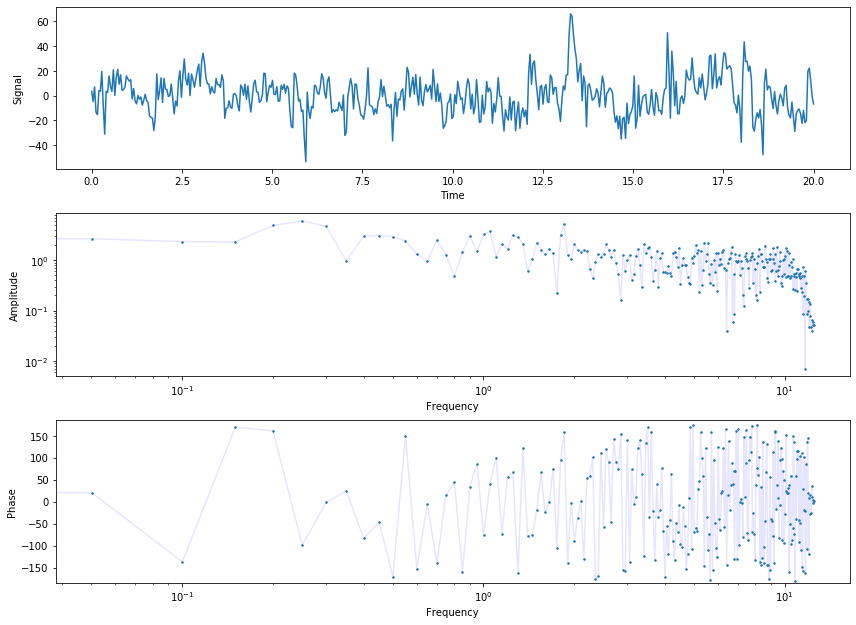

左右.csv


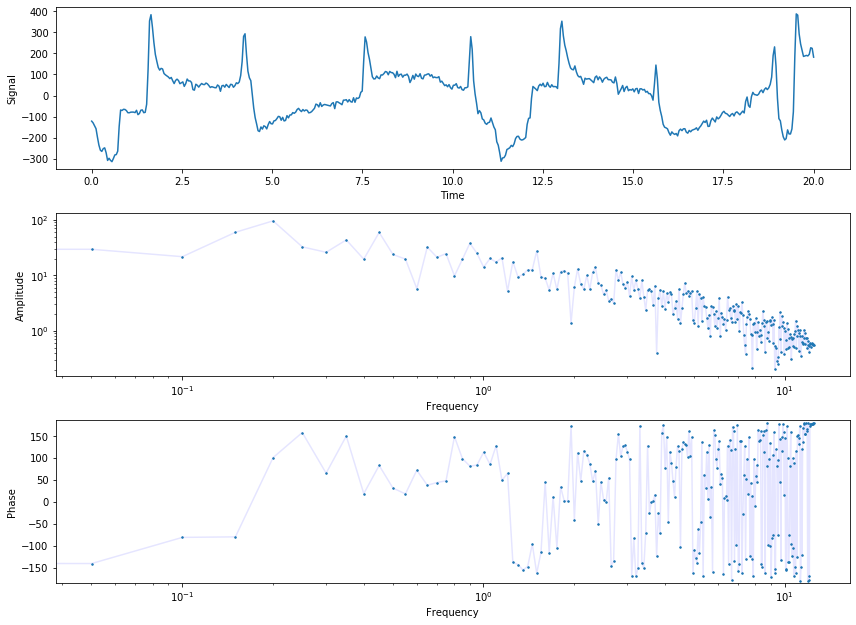

上下2.csv


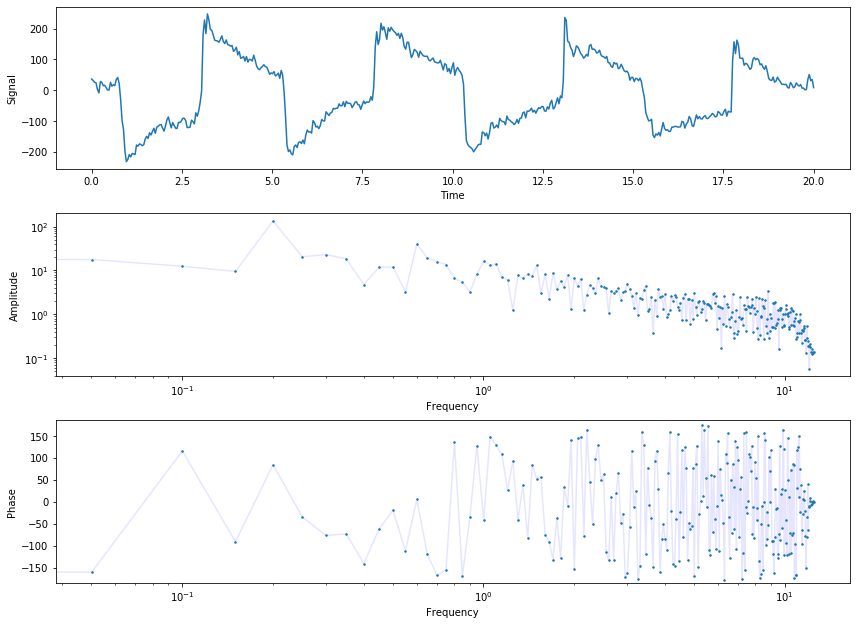

交互2.csv


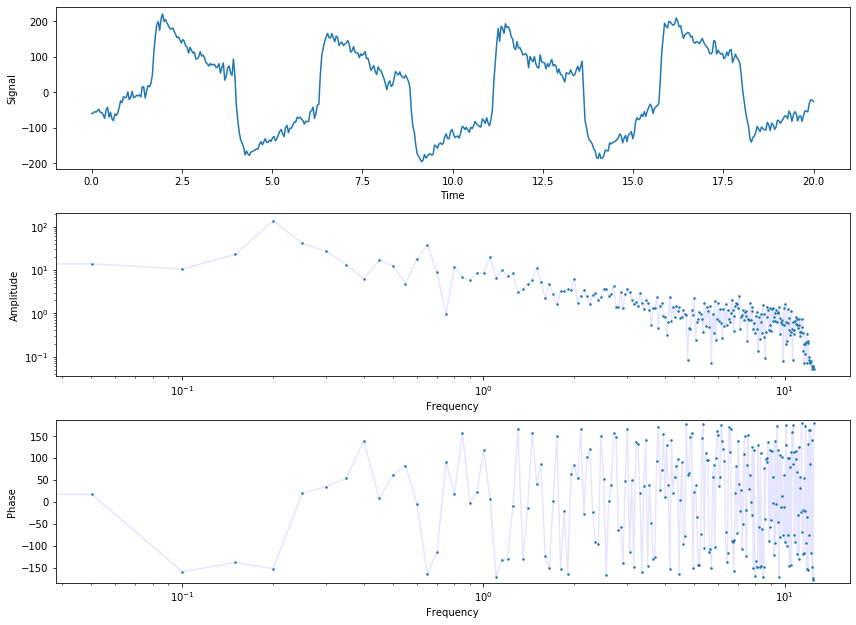

<function __main__.view_single_fft(data, sample_rate)>

In [71]:
for name in f_list:
  print(name)
  view_single_fft(df[df['data_name']==name]['add'],25)
#   df[df['data_name']==name].plot(x='time',subplots=True,sharey=True,ylim=(-500,500))
  plt.show()

view_single_fft

500

加算の微分結果-----------------------
瞬き.csv


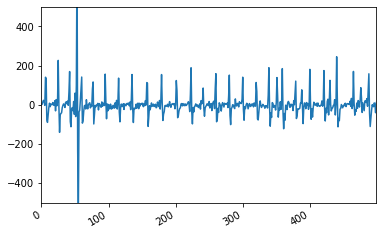

近く.csv


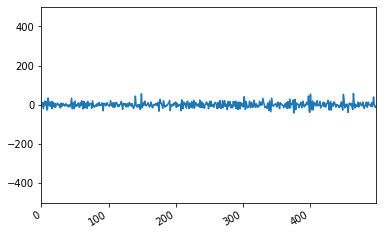

左右.csv


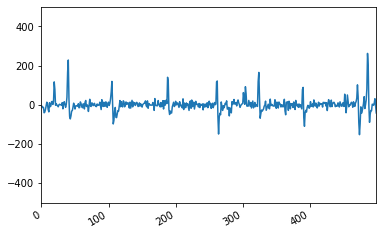

上下2.csv


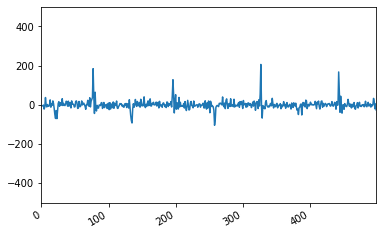

交互2.csv


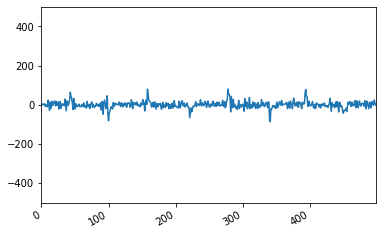

減算の微分結果-----------------------
瞬き.csv


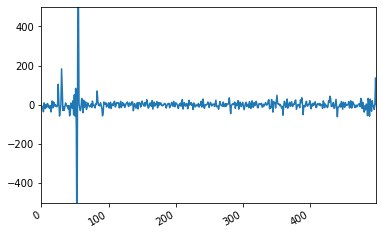

近く.csv


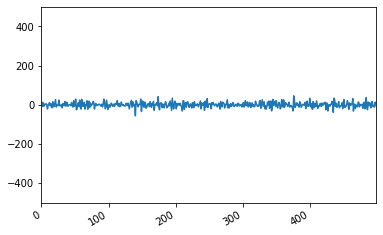

左右.csv


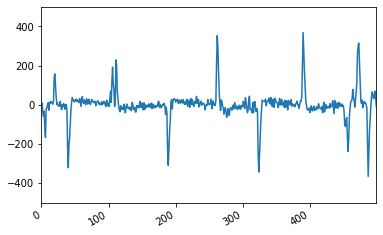

上下2.csv


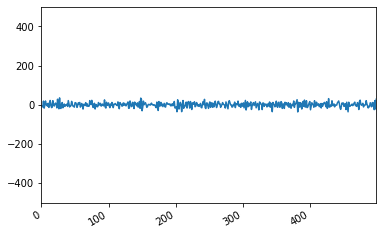

交互2.csv


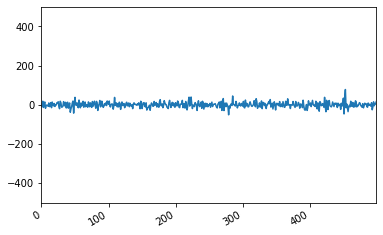

In [72]:
# 微分結果
print('加算の微分結果-----------------------')
for name in f_list:
  print(name)
  df[df['data_name']==name]['add'].diff().plot(x='time',subplots=True,sharey=True,ylim=(-500,500))
  plt.show()
print('減算の微分結果-----------------------')
for name in f_list:
  print(name)
  df[df['data_name']==name]['sub'].diff().plot(x='time',subplots=True,sharey=True,ylim=(-500,500))
  plt.show()

加算の積分結果-----------------------
瞬き.csv


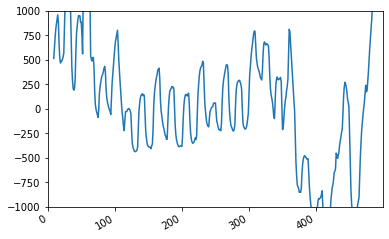

近く.csv


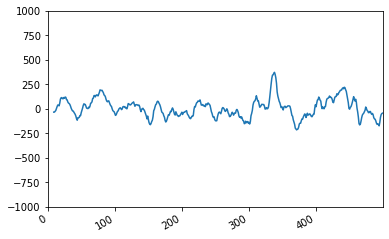

左右.csv


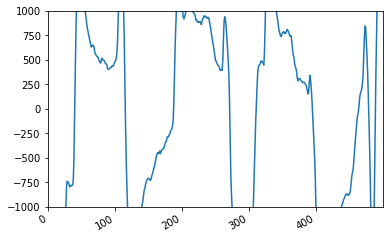

上下2.csv


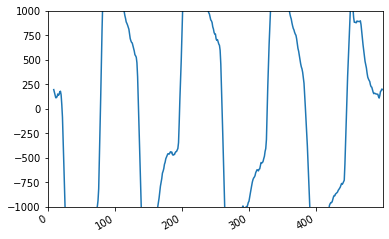

交互2.csv


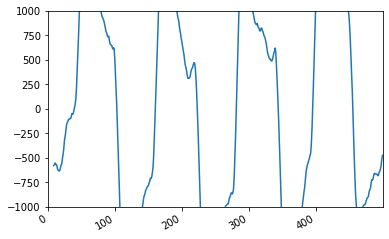

減算の積分結果-----------------------
瞬き.csv


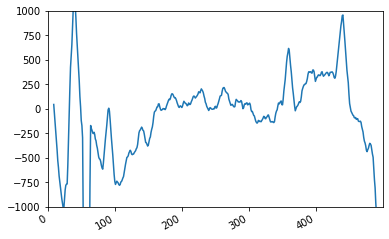

近く.csv


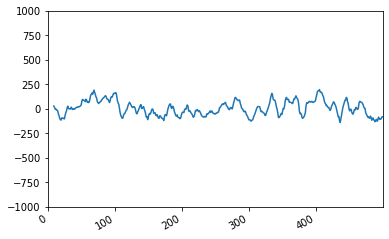

左右.csv


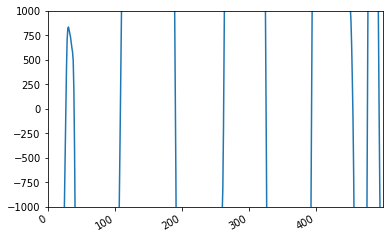

上下2.csv


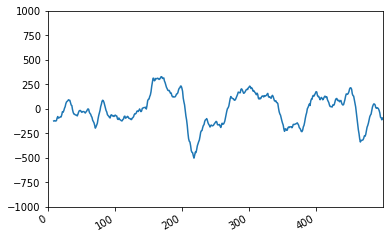

交互2.csv


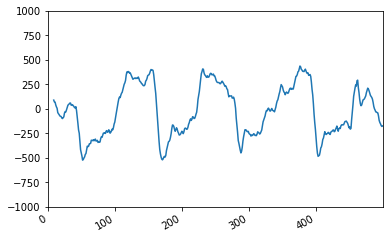

In [73]:
# 積分
print('加算の積分結果-----------------------')
window_size = 10
result = 0;
for name in f_list:
    print(name)
    df[df['data_name']==name]['add'].rolling(window_size).sum().plot(x='time',subplots=True,sharey=True,ylim=(-1000,1000))
    plt.show()
print('減算の積分結果-----------------------')
window_size = 10
result = 0;
for name in f_list:
    print(name)
    df[df['data_name']==name]['sub'].rolling(window_size).sum().plot(x='time',subplots=True,sharey=True,ylim=(-1000,1000))
    plt.show()

In [74]:
np.sqrt(df[df['data_name']==name]['add']**2).rolling(window_size).sum().mean()

1034.114521849324

In [75]:
f_list
f_dict={'近く.csv':'near','瞬き.csv':'mabataki',  '左右.csv':'right-left', '交互2.csv':'near-far', '上下2.csv':'up-down'
}

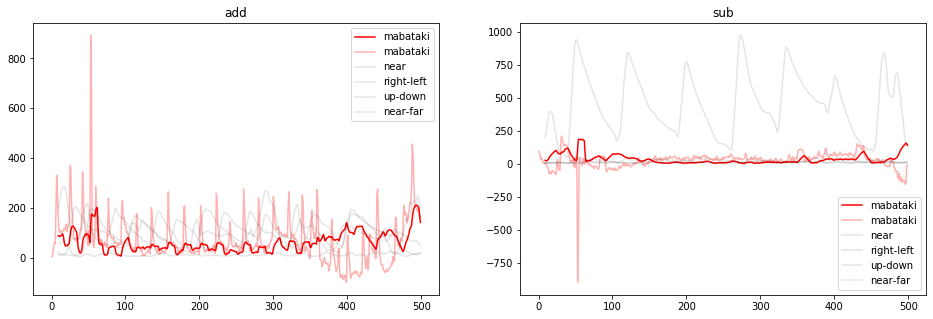

In [76]:
# 積分
fig,ax = plt.subplots(1,2,figsize=(16,5))
for data_name,i in zip(['add','sub'],range(2)):
    for name in f_list:
        amp_data = np.sqrt(df[df['data_name']==name][data_name]**2)
        integrated_data = amp_data.rolling(window_size).sum() / window_size
        data_mean=integrated_data.mean()
        
        if f_dict[name]=='mabataki':
            ax[i].plot(integrated_data,label=f_dict[name],color='red')
            ax[i].plot(df[df['data_name']==name][data_name] + data_mean,label=f_dict[name],color='red',alpha=0.3)
        else:
            ax[i].plot(integrated_data,label=f_dict[name],alpha=0.1,color='black')
    ax[i].set_title(data_name)
    ax[i].legend()
plt.show()

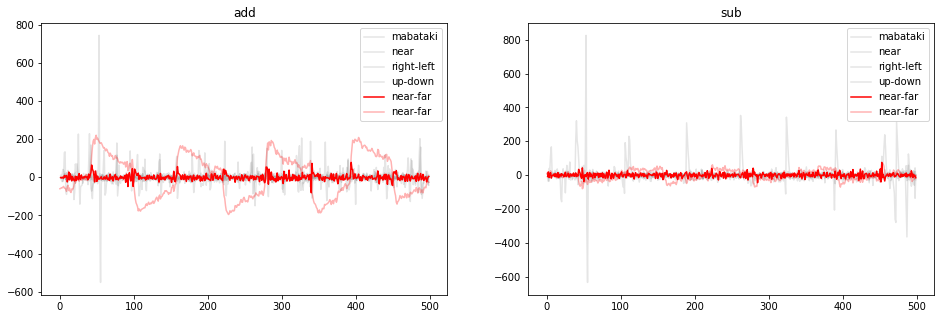

In [77]:
# 微分
fig,ax = plt.subplots(1,2,figsize=(16,5))
for data_name,i in zip(['add','sub'],range(2)):
    for name in f_list:
        if f_dict[name]=='near-far':
            amp_data = np.sqrt(df[df['data_name']==name][data_name]**2)
            data_mean=amp_data.diff()
            ax[i].plot(amp_data.diff(),label=f_dict[name],color='red')
            ax[i].plot(df[df['data_name']==name][data_name],label=f_dict[name],color='red',alpha=0.3)
        else:
            ax[i].plot(np.sqrt(df[df['data_name']==name][data_name]**2).diff(),label=f_dict[name],alpha=0.1,color='black')
    ax[i].set_title(data_name)
    ax[i].legend()
plt.show()

In [78]:
# 瞬きの検知
def detect_blink(data, blink_trigger_threshold, blink_stable_threshold, blink_lower_time, blink_upper_time):
    t = -1
    blink = np.zeros(len(data))
    vergence = np.zeros(len(data))
    cnt = 0
    for i, x in enumerate(data):
        # 微分値が十分大きい時、フラグを立てる
        if i > 1 and x - data[i-1] >= blink_trigger_threshold:
            if t == -1:
                t = i
        if t != -1 and x > blink_stable_threshold:
            cnt += 1
        # その後、電圧値がある程度持続している場合、フラグを消す
        if t != -1 and cnt > blink_lower_time and x < blink_stable_threshold:
            if cnt < blink_upper_time:
                blink[t:t+cnt] = 1
            else:
                vergence[t:t+cnt] = 1
            t = -1
            cnt = 0
        if cnt > blink_upper_time:
            vergence[t:t+cnt] = 1
            t = -1
            cnt = 0
    return blink, vergence

In [79]:
window_size = 3
right_left_threshold = 200
# 瞬きの立ち上がり時の微分閾値
blink_trigger_threshold = 30
# 瞬きの電圧閾値（微分ではない）
blink_stable_threshold = 60
# 瞬きにかかる時間の下限値と上限値
blink_upper_time = 10
blink_lower_time = 0

No handles with labels found to put in legend.
No handles with labels found to put in legend.


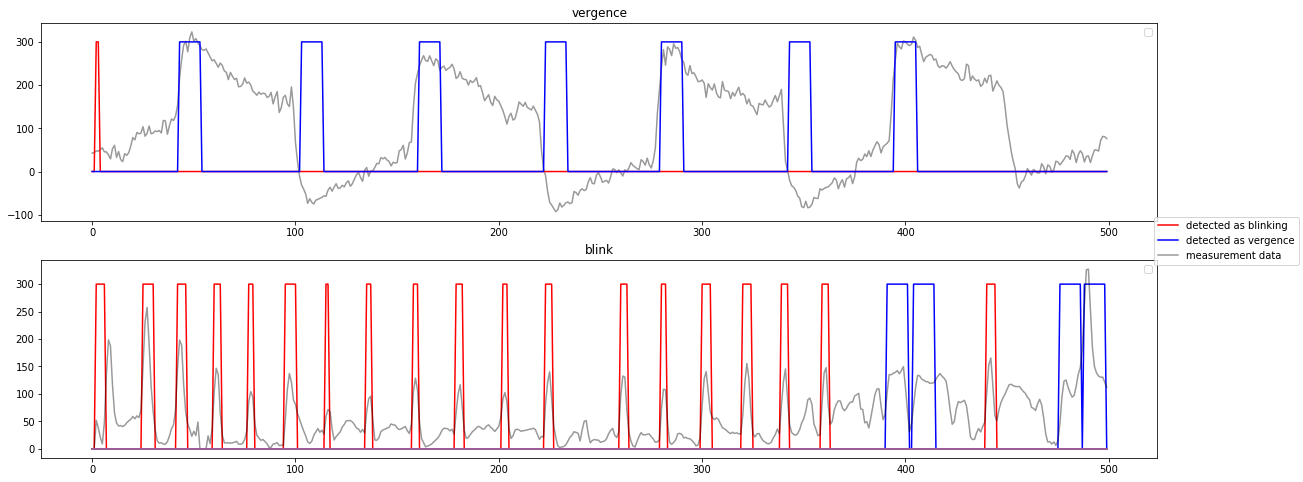

In [98]:
# 結果
# plt.figure(figsize=(20,5))
fig, ax = plt.subplots(2, 1, figsize=(20,8))
ax[0].set_title('vergence')
ax[0].legend()
ax[1].set_title('blink')
ax[1].legend()
for name in f_list:
    amp_data_add = np.sqrt(df[df['data_name']==name]['add']**2)
    integrated_data_add = amp_data_add.rolling(window_size).sum() / window_size
    data_mean_add=integrated_data_add.mean()
    
    amp_data_sub = np.sqrt(df[df['data_name']==name]['sub']**2)
    integrated_data_sub = amp_data_sub.rolling(window_size).sum() / window_size
    
    blink = np.zeros(len(df[df['data_name']==name]['add'].values))
    
    
    plt.plot(blink)
    blink, vergence = detect_blink(
        integrated_data_add.where(np.abs(integrated_data_sub) < right_left_threshold, 0), 
        blink_trigger_threshold, 
        blink_stable_threshold, 
        blink_lower_time,
        blink_upper_time
    )
    if f_dict[name]=='near-far':
#         ax[0].plot(integrated_data_add.where(np.abs(integrated_data_sub) < right_left_threshold, 0),label=f_dict[name],color='red')
        ax[0].plot(df[df['data_name']==name]['add'] + data_mean_add,color='black',alpha=0.4, label='measurement data')
        ax[0].plot(blink * 300, color='red', alpha=1, label='detected as blinking')
        ax[0].plot(vergence * 300, color='blue', alpha=1, label='detected as vergence')
    elif f_dict[name]=='mabataki':
        t = -1
        ax[1].plot(blink * 300, color='red', alpha=1, label='detected as blinking')
        ax[1].plot(vergence * 300, color='blue', alpha=1, label='detected as vergence')
        ax[1].plot(integrated_data_add.where(np.abs(integrated_data_sub) < right_left_threshold, 0),color='black', alpha=0.4, label='measurement data')
#     else:
#         plt.plot(integrated_data_add.where(np.abs(integrated_data_sub) < right_left_threshold, 0),label=f_dict[name],alpha=0.1,color='black')
# plt.title('result')
# plt.legend()
lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'center right')
plt.show()

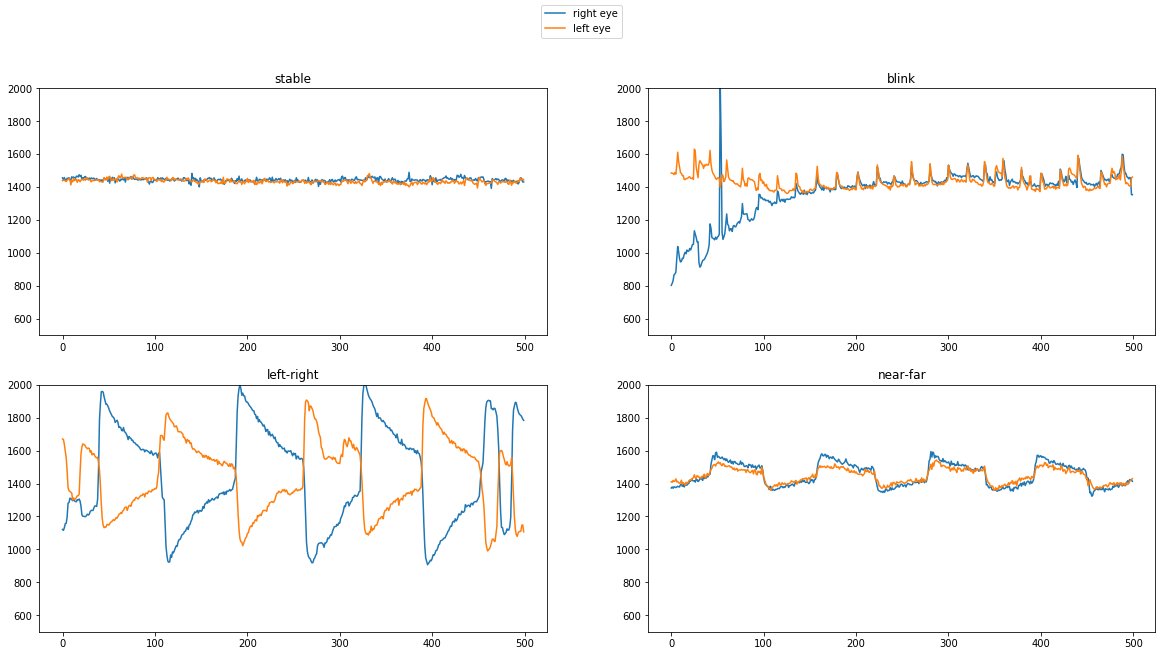

In [104]:
f_list_dash = ['近く.csv','瞬き.csv',  '左右.csv', '交互2.csv', '上下2.csv']
fig, ax = plt.subplots(2,2, figsize=(20,10))
ax[0, 0].set_title('stable')
ax[0, 1].set_title('blink')
ax[1, 0].set_title('left-right')
ax[1, 1].set_title('near-far')
for i, name in enumerate(f_list_dash):
    if i > 3: break
    ax[int(i / 2),int(i % 2)].plot(df[df['data_name']==name]['right'], label='right eye')
    ax[int(i / 2),int(i % 2)].plot(df[df['data_name']==name]['left'], label='left eye')
    ax[int(i / 2),int(i % 2)].set_ylim(500, 2000)

lines, labels = fig.axes[-1].get_legend_handles_labels()
fig.legend(lines, labels, loc = 'upper center')
plt.show()

In [82]:
import pandas as pd

nan = float("nan")

sr1 = pd.Series([0.5, 0.8, nan])
print(sr1[1])
# 出力結果
# 0.8

# NumPyと違って、 インデックスを負にして後ろから数えてくれる機能はない
# print(sr1[-1])

# 代入の例
sr1[1] = 1.8
print(sr1)
# 出力結果
# 0    0.5
# 1    1.8
# 2    NaN
# dtype: float64

0.8
0    0.5
1    1.8
2    NaN
dtype: float64


In [83]:
np.sqrt(df[df['data_name']==name]['add']**2).rolling(window_size).sum()

0             NaN
1             NaN
2       93.124192
3       81.134894
4       52.650881
          ...    
495     38.524548
496     88.621984
497    117.160312
498    117.371495
499     74.462614
Name: add, Length: 500, dtype: float64